In [1]:
import os
import librosa
import numpy as np
import pandas as pd

In [2]:
# Set the path to the directory containing the audio files
audio_dir = './dataverse_files'

def load_audio_files(directory):
    audio_files = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith('.wav'):
            filepath = os.path.join(directory, filename)
            y, sr = librosa.load(filepath, sr=None)
            emotion = filename.split('_')[2]  # Assuming the emotion is the third part of the filename
            audio_files.append((y, sr))
            labels.append(emotion)
    return audio_files, labels

# Load the audio files and their labels
audio_files, labels = load_audio_files(audio_dir)

In [3]:
# Display the first few loaded files and their labels
for i in range(3):
    print(f"Audio file {i+1}:")
    print(f"  Signal: {audio_files[i][0]}")
    print(f"  Sample rate: {audio_files[i][1]}")
    print(f"  Emotion: {labels[i]}")

Audio file 1:
  Signal: [3.0517578e-04 1.2207031e-04 3.0517578e-05 ... 1.2207031e-04 6.1035156e-05
 0.0000000e+00]
  Sample rate: 24414
  Emotion: angry.wav
Audio file 2:
  Signal: [ 0.0000000e+00 -1.2207031e-04 -9.1552734e-05 ...  6.7138672e-04
  4.8828125e-04  5.7983398e-04]
  Sample rate: 24414
  Emotion: neutral.wav
Audio file 3:
  Signal: [ 0.0000000e+00 -9.1552734e-05 -9.1552734e-05 ... -3.3569336e-04
 -3.0517578e-04 -1.2207031e-04]
  Sample rate: 24414
  Emotion: ps.wav


In [47]:
import librosa
import numpy as np

# Extract MFCCs: overall average, max, and min values
def extract_mfcc(y, sr):
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    avg_mfccs = np.mean(mfccs, axis=1)
    overall_avg_mfcc = np.mean(avg_mfccs)
    max_mfccs = np.max(mfccs, axis=1)
    overall_max_mfcc = np.mean(max_mfccs)
    min_mfccs = np.min(mfccs, axis=1)
    overall_min_mfcc = np.mean(min_mfccs)
    return overall_avg_mfcc, overall_max_mfcc, overall_min_mfcc

# Extract Pitch: overall average, max, and min values
def extract_pitch(y, sr):
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    pitch = [pitches[:, i].max() for i in range(pitches.shape[1])]
    pitch = np.array([p for p in pitch if p > 0])  # Remove zero values
    avg_pitch = np.mean(pitch) if len(pitch) > 0 else 0
    max_pitch = np.max(pitch) if len(pitch) > 0 else 0
    min_pitch = np.min(pitch) if len(pitch) > 0 else 0
    return avg_pitch, max_pitch, min_pitch

# Extract Energy/Intensity
def extract_energy(y):
    rms = librosa.feature.rms(y=y)
    mean_energy = np.mean(rms)
    return mean_energy

# Extract Duration
def extract_duration(y, sr):
    return librosa.get_duration(y=y, sr=sr)


In [57]:
# Import necessary library
import librosa

# Initialize lists to store features
avg_mfcc_features = []
max_mfcc_features = []
min_mfcc_features = []
avg_pitch_features = []
max_pitch_features = []
min_pitch_features = []
energy_features = []
duration_features = []

# Extract and store features for each audio file
for y, sr in audio_files:
    avg_mfcc, max_mfcc, min_mfcc = extract_mfcc(y, sr)
    avg_mfcc_features.append(avg_mfcc)
    max_mfcc_features.append(max_mfcc)
    min_mfcc_features.append(min_mfcc)
    
    avg_pitch, max_pitch, min_pitch = extract_pitch(y, sr)
    avg_pitch_features.append(avg_pitch)
    max_pitch_features.append(max_pitch)
    min_pitch_features.append(min_pitch)
    
    energy_features.append(extract_energy(y))
    duration_features.append(librosa.get_duration(y=y, sr=sr))

# Create a DataFrame
features_df = pd.DataFrame({
    'Avg_MFCCs': avg_mfcc_features,
    'Max_MFCCs': max_mfcc_features,
    'Min_MFCCs': min_mfcc_features,
    'Avg_Pitch': avg_pitch_features,
    'Max_Pitch': max_pitch_features,
    'Min_Pitch': min_pitch_features,
    'Energy': energy_features,
    'Duration': duration_features,
    'Emotion': labels
})

# Display the DataFrame
features_df.head()


,Avg_MFCCs,Max_MFCCs,Min_MFCCs,Avg_Pitch,Max_Pitch,Min_Pitch,Energy,Duration,Emotion
0,-27.953793,37.365513,-103.488678,1832.425903,3985.993896,195.852158,0.039251,2.000451,angry.wav
1,-33.219109,11.911955,-97.044014,1449.045410,3987.052246,186.114929,0.010234,2.052757,neutral.wav
2,-28.494967,26.614315,-104.832436,1568.182007,3992.652832,180.569580,0.026914,2.058040,ps.wav
3,-26.289722,32.884193,-83.902382,1794.889038,3988.344727,199.700089,0.048039,1.745064,fear.wav
4,-34.663815,15.686101,-101.344887,1656.760986,3999.317383,297.126740,0.019980,1.728967,fear.wav


In [58]:
# Filter the DataFrame for each emotion
angry_df = features_df[features_df['Emotion'] == 'angry.wav']
disgust_df = features_df[features_df['Emotion'] == 'disgust.wav']
fear_df = features_df[features_df['Emotion'] == 'fear.wav']
happy_df = features_df[features_df['Emotion'] == 'happy.wav']
neutral_df = features_df[features_df['Emotion'] == 'neutral.wav']
sad_df = features_df[features_df['Emotion'] == 'sad.wav']
surprise_df = features_df[features_df['Emotion'] == 'ps.wav']

# Print a few rows from each DataFrame
print("Angry Emotion:")
print(angry_df.head(), "\n")

print("Disgust Emotion:")
print(disgust_df.head(), "\n")

print("Fear Emotion:")
print(fear_df.head(), "\n")

print("Happy Emotion:")
print(happy_df.head(), "\n")

print("Neutral Emotion:")
print(neutral_df.head(), "\n")

print("Sad Emotion:")
print(sad_df.head(), "\n")

print("Surprise Emotion:")
print(surprise_df.head(), "\n")


Angry Emotion:
    Avg_MFCCs  Max_MFCCs   Min_MFCCs    Avg_Pitch    Max_Pitch   Min_Pitch  \
0  -27.953793  37.365513 -103.488678  1832.425903  3985.993896  195.852158   
8  -28.204710  33.056591 -109.862846  2471.529785  3996.596191  394.137695   
28 -28.280846  32.947605 -104.745895  1666.661133  3995.165039  193.049637   
35 -32.505512  17.717077  -98.809853  1687.896729  3966.830811  359.991394   
40 -31.505816  21.629251  -95.900436  1942.704468  3987.380371  162.779480   

      Energy  Duration    Emotion  
0   0.039251  2.000451  angry.wav  
8   0.043568  2.057959  angry.wav  
28  0.034049  2.009093  angry.wav  
35  0.027943  1.534980  angry.wav  
40  0.037891  1.652535  angry.wav   

Disgust Emotion:
    Avg_MFCCs  Max_MFCCs   Min_MFCCs    Avg_Pitch    Max_Pitch   Min_Pitch  \
7  -29.573957  30.104187 -104.745064  1461.824341  3983.648193  190.624283   
10 -29.805971  30.922771 -107.370239  1971.543579  3999.237061  167.191925   
12 -30.378174  29.629763 -107.173225  1985.6043

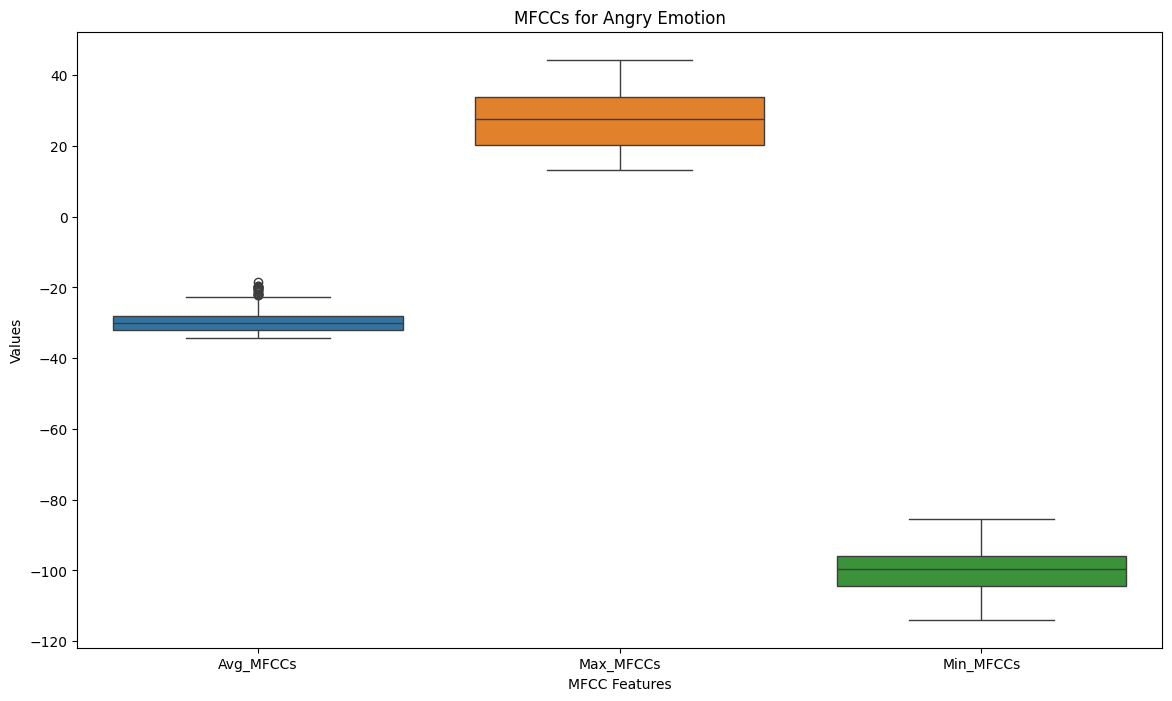

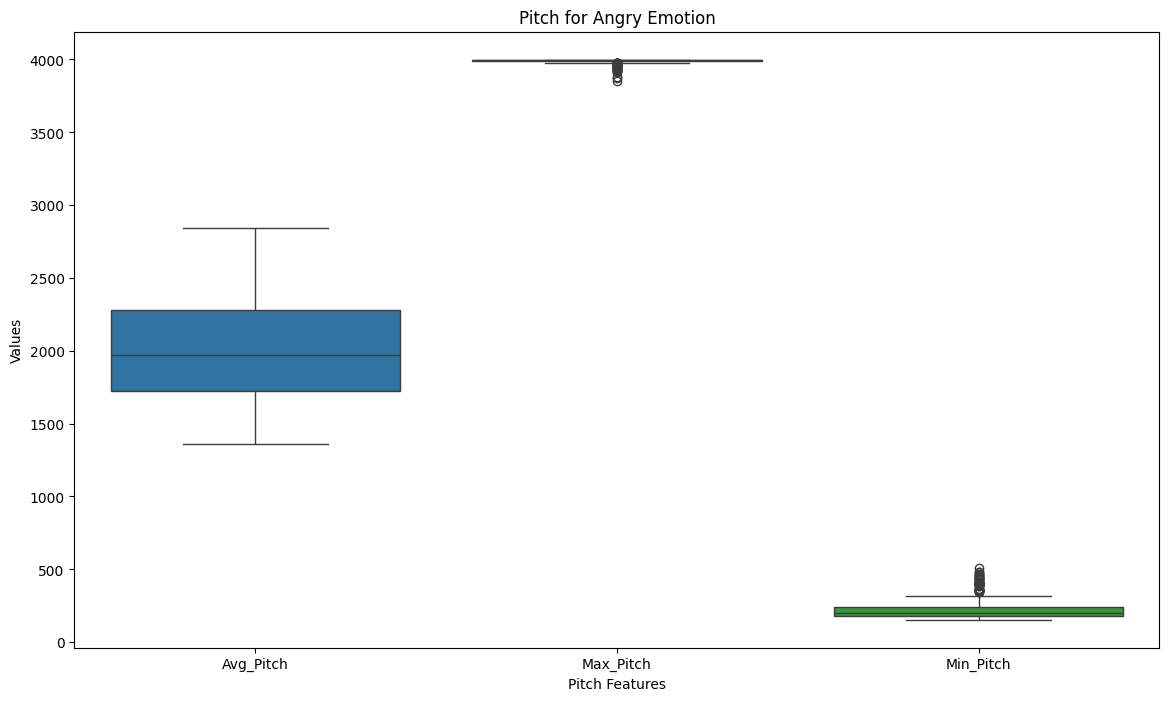

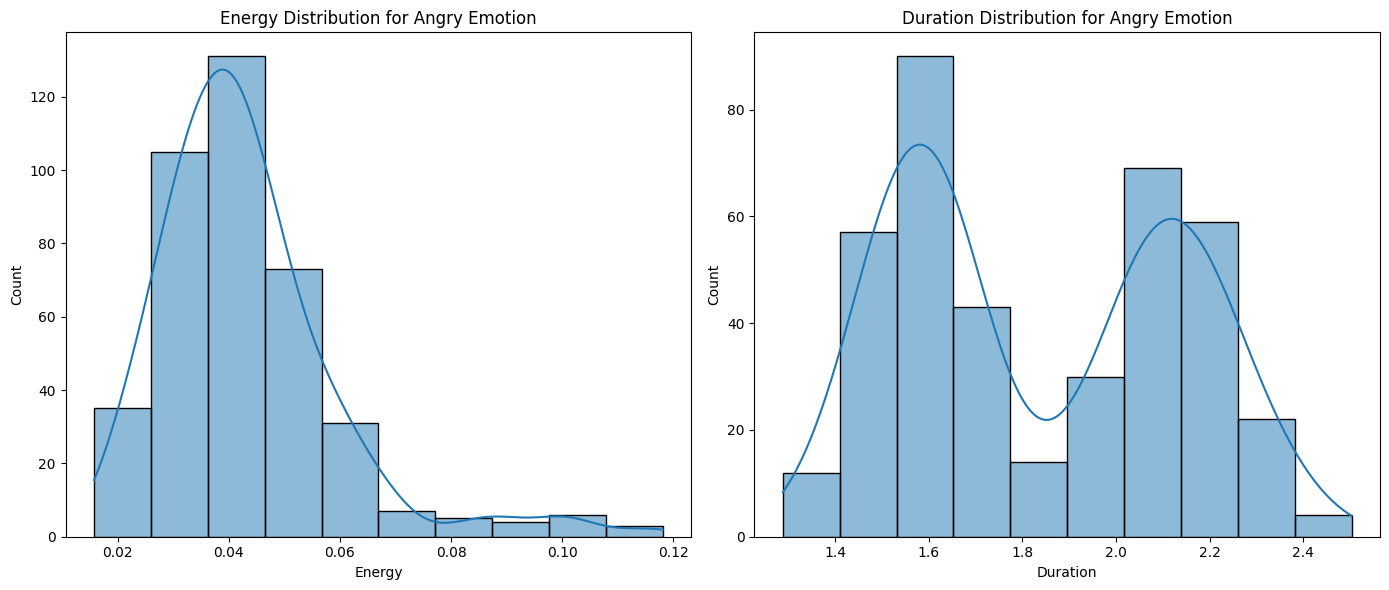

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns


# Visualize MFCCs for Angry Emotion
plt.figure(figsize=(14, 8))
sns.boxplot(data=angry_df[['Avg_MFCCs', 'Max_MFCCs', 'Min_MFCCs']])
plt.title('MFCCs for Angry Emotion')
plt.xlabel('MFCC Features')
plt.ylabel('Values')
plt.show()

# Visualize Pitch for Angry Emotion
plt.figure(figsize=(14, 8))
sns.boxplot(data=angry_df[['Avg_Pitch', 'Max_Pitch', 'Min_Pitch']])
plt.title('Pitch for Angry Emotion')
plt.xlabel('Pitch Features')
plt.ylabel('Values')
plt.show()

# Visualize Energy and Duration for Angry Emotion if there are enough elements
if len(angry_df) > 1:
    plt.figure(figsize=(14, 6))
    
    # Energy
    plt.subplot(1, 2, 1)
    sns.histplot(angry_df['Energy'], bins=10, kde=True)
    plt.title('Energy Distribution for Angry Emotion')

    # Duration
    plt.subplot(1, 2, 2)
    sns.histplot(angry_df['Duration'], bins=10, kde=True)
    plt.title('Duration Distribution for Angry Emotion')

    plt.tight_layout()
    plt.show()
else:
    print("Not enough data points to plot Energy and Duration distributions for Angry Emotion.")


/tmp/ipykernel_186876/725653826.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Emotion', y='Avg_MFCCs', data=features_df, palette="viridis")


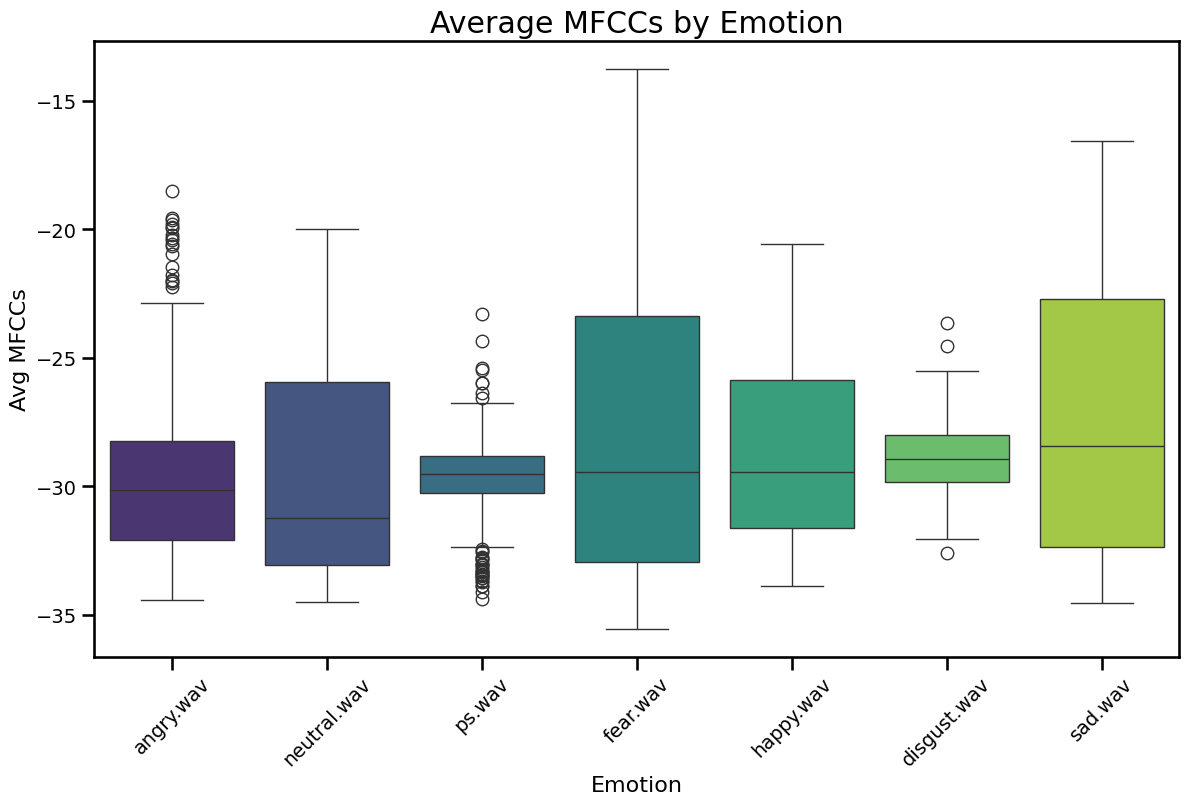

/tmp/ipykernel_186876/725653826.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Emotion', y='Max_MFCCs', data=features_df, palette="viridis")


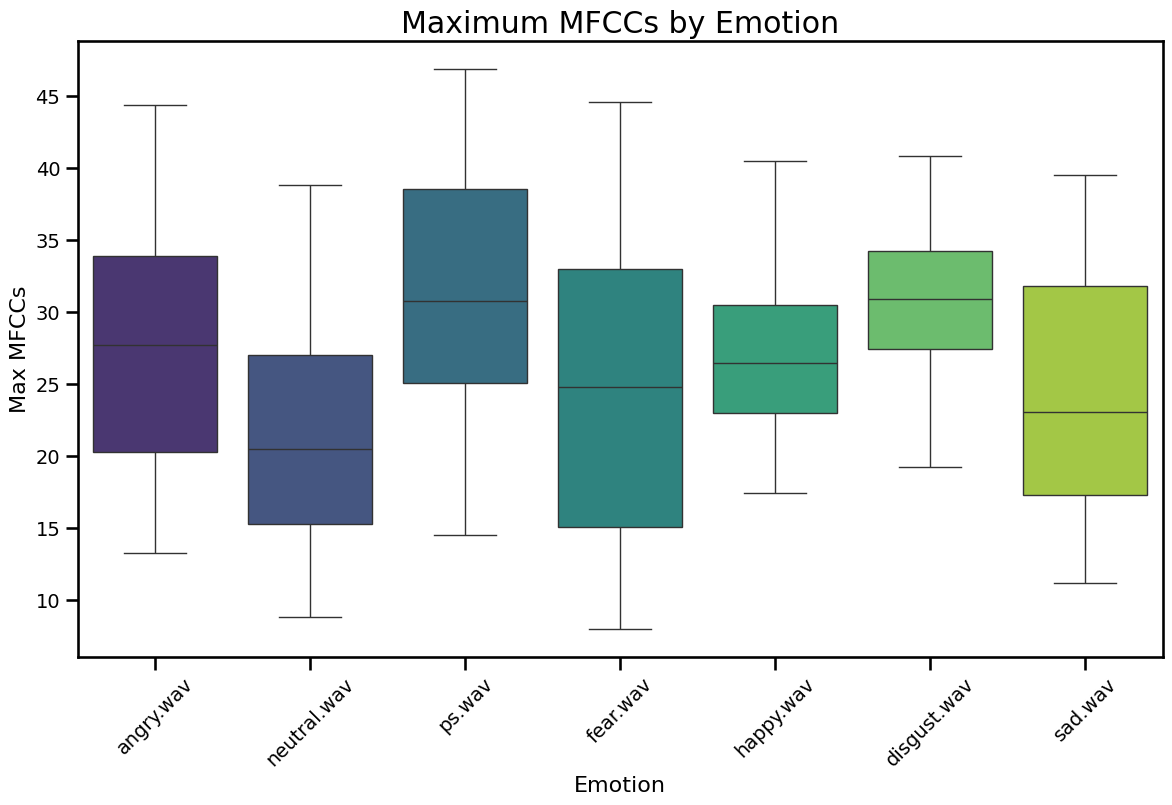

/tmp/ipykernel_186876/725653826.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Emotion', y='Min_MFCCs', data=features_df, palette="viridis")


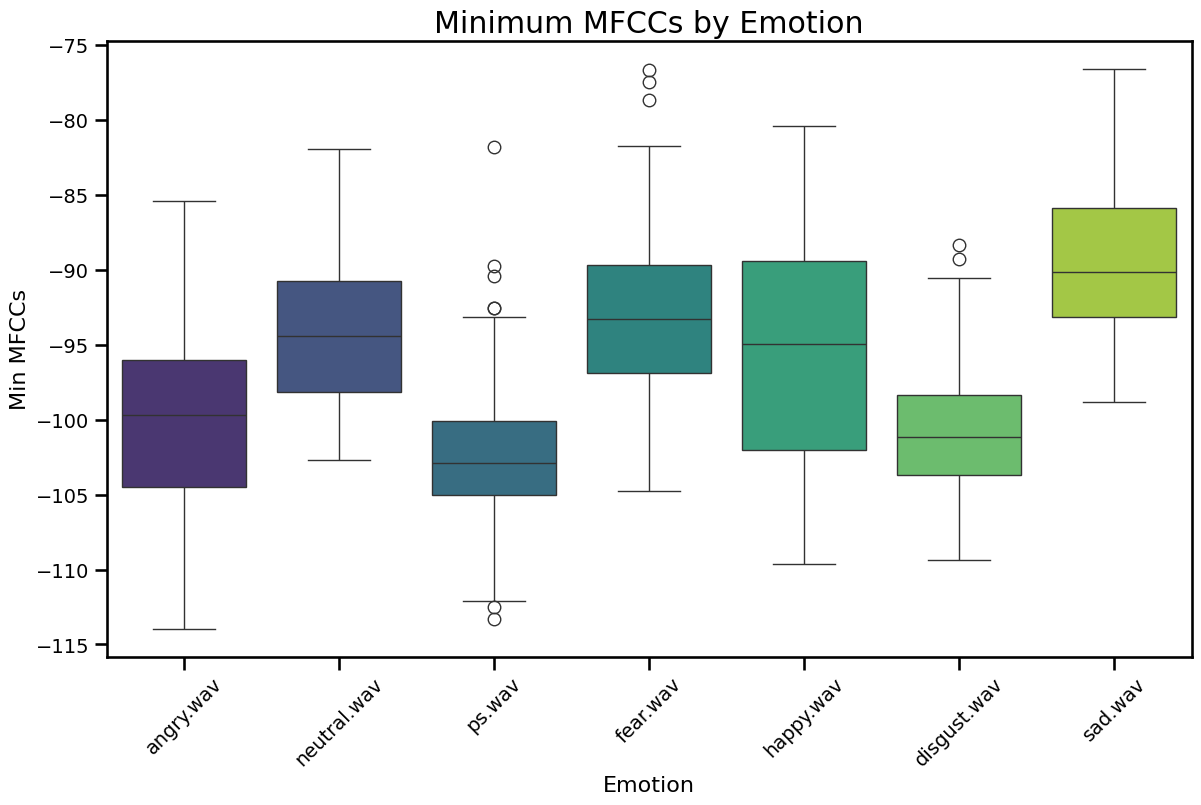

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and context for larger fonts
sns.set_context("talk", font_scale=1.2)

# Plot for Average MFCCs by Emotion
plt.figure(figsize=(14, 8))
sns.boxplot(x='Emotion', y='Avg_MFCCs', data=features_df, palette="viridis")
plt.title('Average MFCCs by Emotion')
plt.xlabel('Emotion', fontsize=16)
plt.ylabel('Avg MFCCs', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Plot for Maximum MFCCs by Emotion
plt.figure(figsize=(14, 8))
sns.boxplot(x='Emotion', y='Max_MFCCs', data=features_df, palette="viridis")
plt.title('Maximum MFCCs by Emotion')
plt.xlabel('Emotion', fontsize=16)
plt.ylabel('Max MFCCs', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Plot for Minimum MFCCs by Emotion
plt.figure(figsize=(14, 8))
sns.boxplot(x='Emotion', y='Min_MFCCs', data=features_df, palette="viridis")
plt.title('Minimum MFCCs by Emotion')
plt.xlabel('Emotion', fontsize=16)
plt.ylabel('Min MFCCs', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()


/tmp/ipykernel_186876/1467054538.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Emotion', y='Avg_Pitch', data=features_df, palette="viridis")


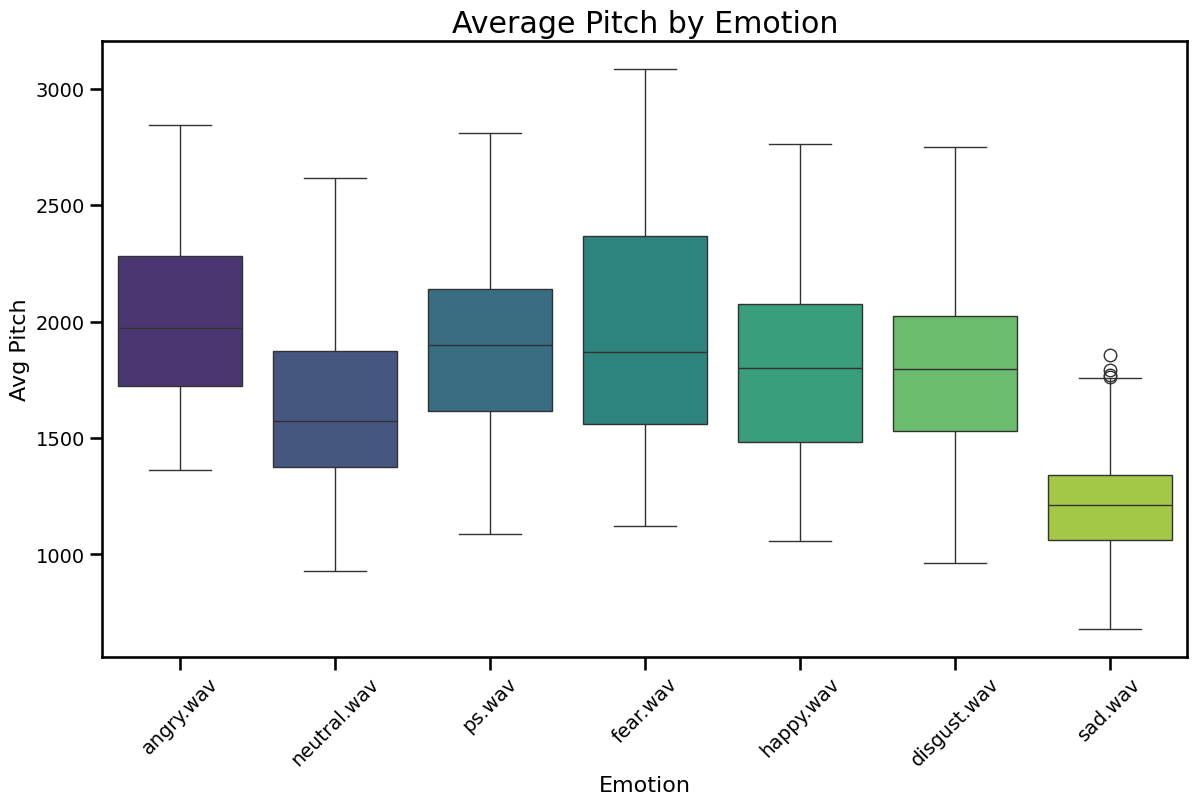

/tmp/ipykernel_186876/1467054538.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Emotion', y='Max_Pitch', data=features_df, palette="viridis")


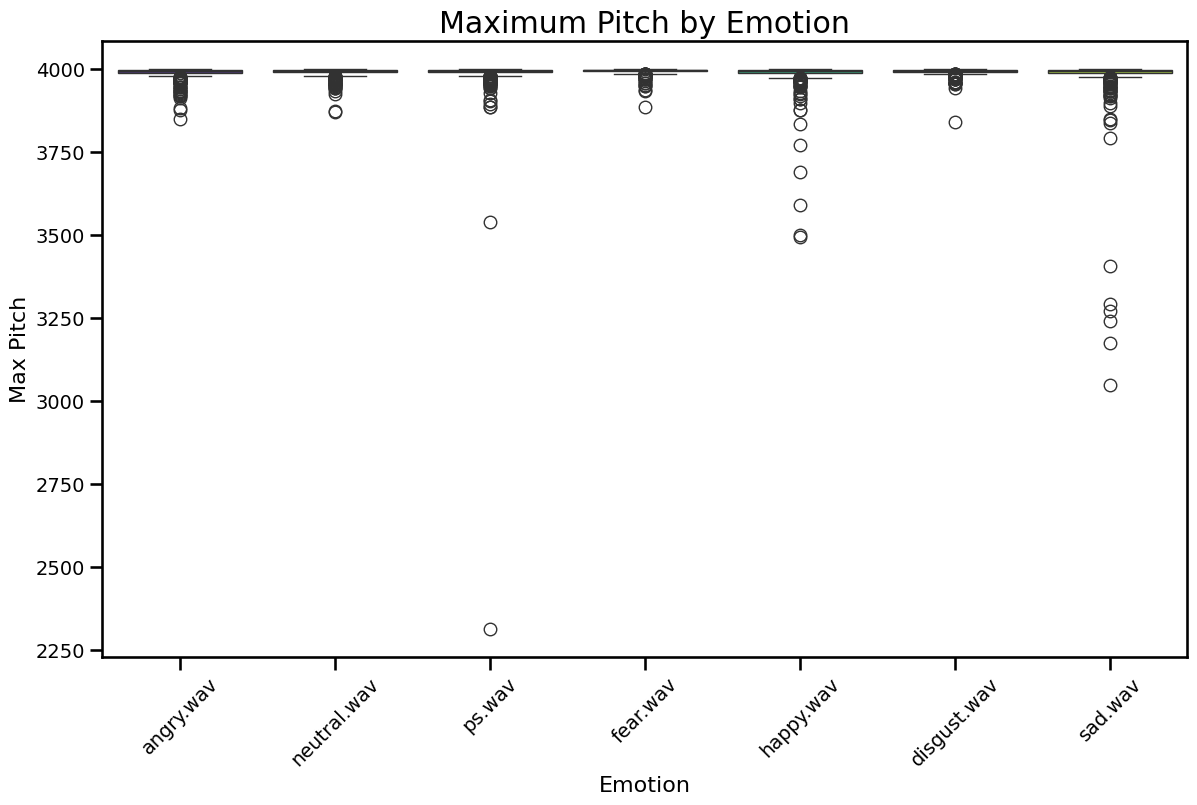

/tmp/ipykernel_186876/1467054538.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Emotion', y='Min_Pitch', data=features_df, palette="viridis")


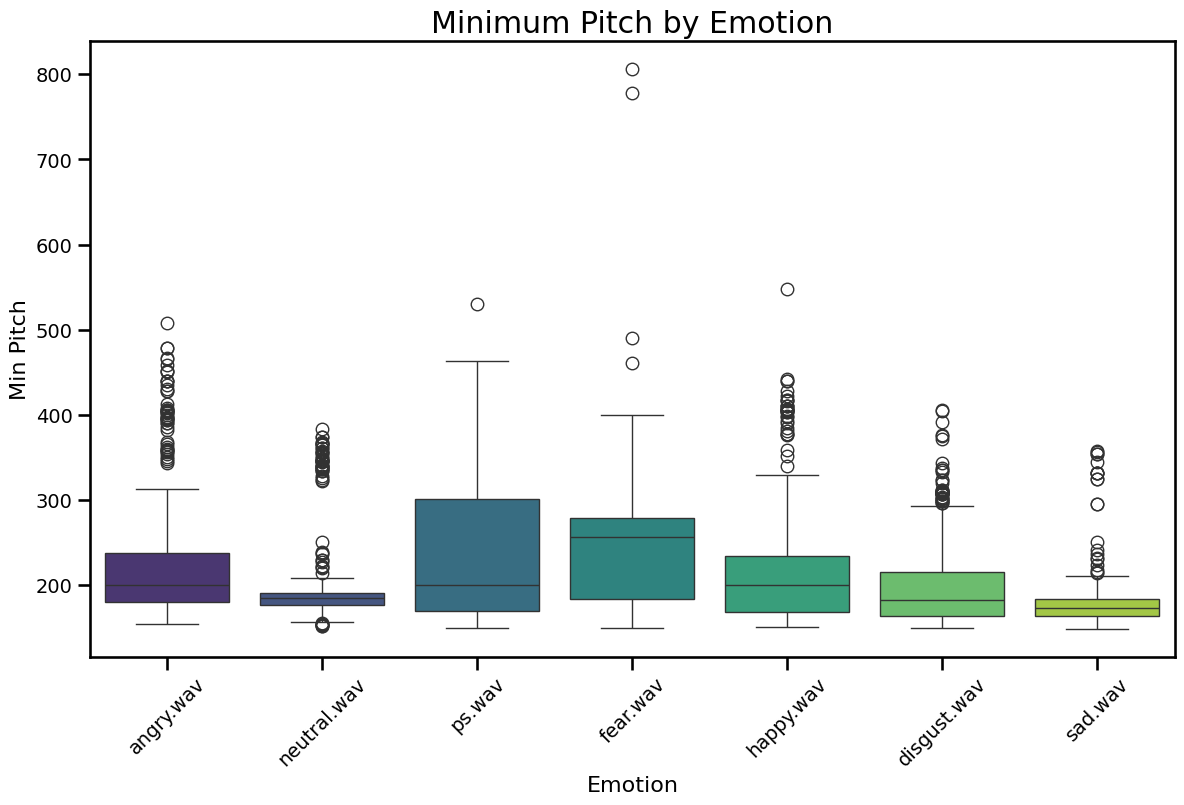

In [98]:
# Set the style and context for larger fonts
sns.set_context("talk", font_scale=1.2)

# Plot for Average Pitch by Emotion
plt.figure(figsize=(14, 8))
sns.boxplot(x='Emotion', y='Avg_Pitch', data=features_df, palette="viridis")
plt.title('Average Pitch by Emotion')
plt.xlabel('Emotion', fontsize=16)
plt.ylabel('Avg Pitch', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Plot for Maximum Pitch by Emotion
plt.figure(figsize=(14, 8))
sns.boxplot(x='Emotion', y='Max_Pitch', data=features_df, palette="viridis")
plt.title('Maximum Pitch by Emotion')
plt.xlabel('Emotion', fontsize=16)
plt.ylabel('Max Pitch', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Plot for Minimum Pitch by Emotion
plt.figure(figsize=(14, 8))
sns.boxplot(x='Emotion', y='Min_Pitch', data=features_df, palette="viridis")
plt.title('Minimum Pitch by Emotion')
plt.xlabel('Emotion', fontsize=16)
plt.ylabel('Min Pitch', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

/tmp/ipykernel_186876/2285769360.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Emotion', y='Energy', data=features_df, palette="viridis")


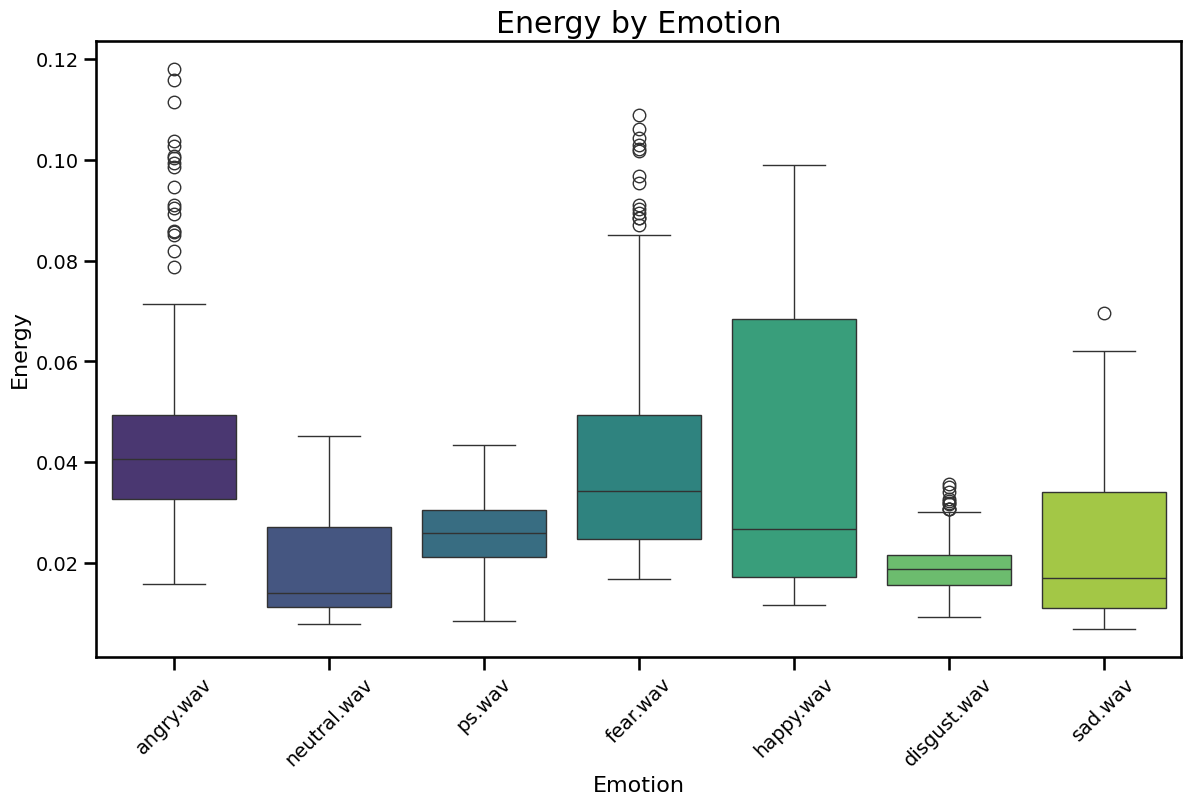

/tmp/ipykernel_186876/2285769360.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Emotion', y='Duration', data=features_df, palette="viridis")


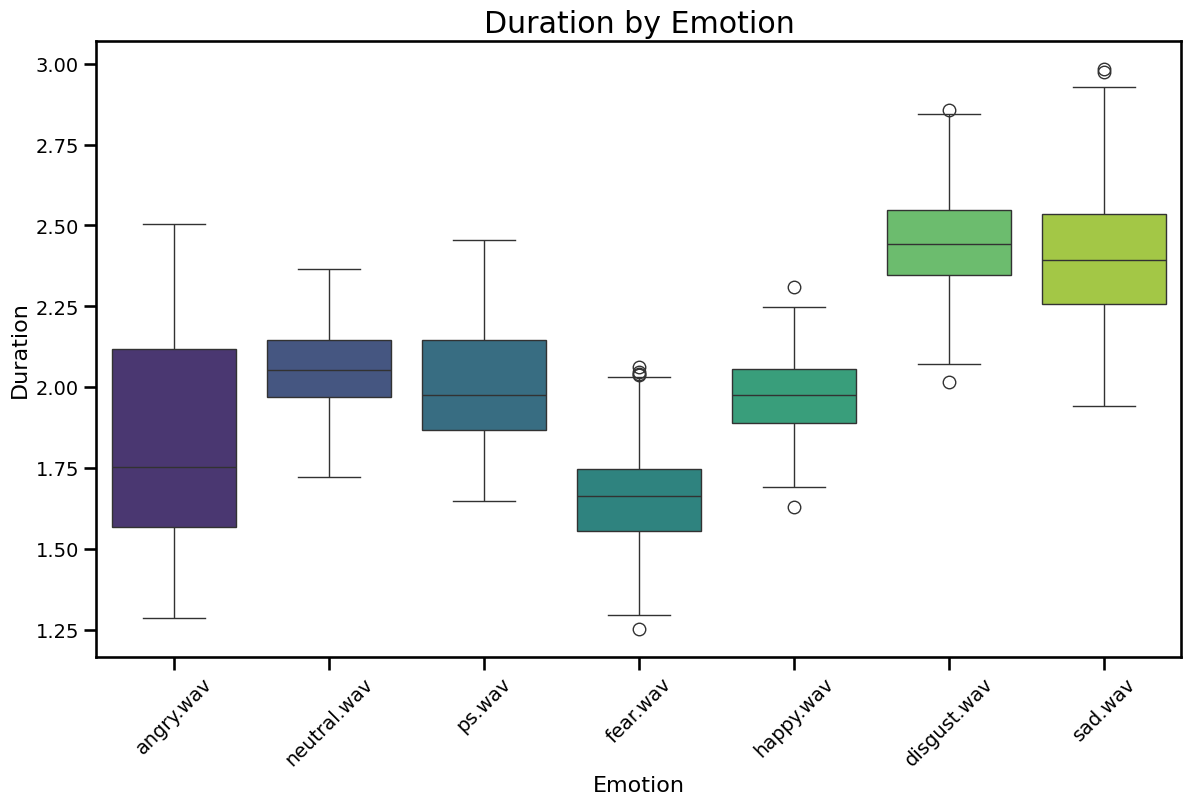

In [99]:
# Set the style and context for larger fonts
sns.set_context("talk", font_scale=1.2)

# Plot for Energy by Emotion
plt.figure(figsize=(14, 8))
sns.boxplot(x='Emotion', y='Energy', data=features_df, palette="viridis")
plt.title('Energy by Emotion')
plt.xlabel('Emotion', fontsize=16)
plt.ylabel('Energy', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Plot for Duration by Emotion
plt.figure(figsize=(14, 8))
sns.boxplot(x='Emotion', y='Duration', data=features_df, palette="viridis")
plt.title('Duration by Emotion')
plt.xlabel('Emotion', fontsize=16)
plt.ylabel('Duration', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [70]:
import scipy.stats as stats

# Perform one-way ANOVA for Energy across different emotions
anova_result = stats.f_oneway(
    features_df[features_df['Emotion'] == 'angry.wav']['Energy'],
    features_df[features_df['Emotion'] == 'disgust.wav']['Energy'],
    features_df[features_df['Emotion'] == 'fear.wav']['Energy'],
    features_df[features_df['Emotion'] == 'happy.wav']['Energy'],
    features_df[features_df['Emotion'] == 'neutral.wav']['Energy'],
    features_df[features_df['Emotion'] == 'sad.wav']['Energy'],
    features_df[features_df['Emotion'] == 'ps.wav']['Energy']
)

print(f'ANOVA result for Energy: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}')


ANOVA result for Energy: F-statistic = 201.7224089093251, p-value = 4.057887297899138e-214


In [71]:
import itertools

# List of emotions
emotions = features_df['Emotion'].unique()

# Function to perform pairwise T-tests
def pairwise_t_tests(feature):
    results = {}
    for (emotion1, emotion2) in itertools.combinations(emotions, 2):
        t_stat, p_val = stats.ttest_ind(
            features_df[features_df['Emotion'] == emotion1][feature],
            features_df[features_df['Emotion'] == emotion2][feature]
        )
        results[(emotion1, emotion2)] = (t_stat, p_val)
    return results

# Perform pairwise T-tests for Energy
t_test_results_energy = pairwise_t_tests('Energy')
print("Pairwise T-test results for Energy:")
for pair, result in t_test_results_energy.items():
    print(f'{pair}: t-statistic = {result[0]}, p-value = {result[1]}')


Pairwise T-test results for Energy:
('angry.wav', 'neutral.wav'): t-statistic = 25.35957849000951, p-value = 1.6015840827038028e-104
('angry.wav', 'ps.wav'): t-statistic = 19.45494868072845, p-value = 2.6892776891146244e-69
('angry.wav', 'fear.wav'): t-statistic = 2.405032668387175, p-value = 0.016397757510982634
('angry.wav', 'happy.wav'): t-statistic = 0.2184600855775282, p-value = 0.8271265094077676
('angry.wav', 'disgust.wav'): t-statistic = 28.19390891227811, p-value = 6.72226735661559e-122
('angry.wav', 'sad.wav'): t-statistic = 18.645222412312503, p-value = 1.113790963685235e-64
('neutral.wav', 'ps.wav'): t-statistic = -11.789288533632106, p-value = 1.0952667860000476e-29
('neutral.wav', 'fear.wav'): t-statistic = -19.607408259326025, p-value = 3.5678713677330076e-70
('neutral.wav', 'happy.wav'): t-statistic = -16.536743131331306, p-value = 4.829359400848478e-53
('neutral.wav', 'disgust.wav'): t-statistic = 0.32662892698406354, p-value = 0.7440342096586097
('neutral.wav', 'sad.w

In [76]:
# Descriptive statistics for Avg_MFCCs
avg_mfcc_stats = features_df.groupby('Emotion')['Avg_MFCCs'].agg(['mean', 'std', 'min', 'max', 'median']).reset_index()
print("Descriptive Statistics for Avg_MFCCs")
avg_mfcc_stats


Descriptive Statistics for Avg_MFCCs


,Emotion,mean,std,min,max,median
0,angry.wav,-29.744143,3.002525,-34.403664,-18.522709,-30.135273
1,disgust.wav,-28.847248,1.361485,-32.583145,-23.624430,-28.939850
2,fear.wav,-28.013756,5.356719,-35.534306,-13.742521,-29.425941
3,happy.wav,-28.744301,3.125520,-33.859623,-20.574398,-29.437111
4,neutral.wav,-29.378563,3.763920,-34.479790,-19.991484,-31.227571
5,ps.wav,-29.644377,1.560006,-34.367599,-23.293922,-29.498047
6,sad.wav,-27.344994,4.978273,-34.554493,-16.570395,-28.435692


In [77]:
# Descriptive statistics for Avg_Pitch
avg_pitch_stats = features_df.groupby('Emotion')['Avg_Pitch'].agg(['mean', 'std', 'min', 'max', 'median']).reset_index()
print("Descriptive Statistics for Avg_Pitch")
avg_pitch_stats


Descriptive Statistics for Avg_Pitch


,Emotion,mean,std,min,max,median
0,angry.wav,2010.878296,351.769165,1361.030518,2844.034668,1970.162964
1,disgust.wav,1799.841309,338.681915,961.076355,2750.390869,1798.104980
2,fear.wav,1976.036255,482.366394,1120.733887,3085.892822,1870.182617
3,happy.wav,1802.822754,360.903381,1058.902588,2762.287354,1801.707642
4,neutral.wav,1625.163940,344.269653,926.678772,2615.404541,1572.574829
5,ps.wav,1903.819580,362.906891,1086.788208,2811.496826,1901.243530
6,sad.wav,1214.534546,226.999741,681.197021,1856.909668,1210.465332


In [78]:
# Descriptive statistics for Energy
energy_stats = features_df.groupby('Emotion')['Energy'].agg(['mean', 'std', 'min', 'max', 'median']).reset_index()
print("Descriptive Statistics for Energy")
energy_stats

Descriptive Statistics for Energy


,Emotion,mean,std,min,max,median
0,angry.wav,0.043077,0.016283,0.015775,0.118095,0.040575
1,disgust.wav,0.019125,0.004851,0.009376,0.035714,0.018909
2,fear.wav,0.040065,0.019031,0.016751,0.108921,0.034292
3,happy.wav,0.042734,0.026775,0.011637,0.099071,0.026852
4,neutral.wav,0.019297,0.009305,0.007903,0.045298,0.014128
5,ps.wav,0.026004,0.006549,0.008541,0.043370,0.025881
6,sad.wav,0.023458,0.013332,0.007003,0.069644,0.017110


In [79]:
# Descriptive statistics for Duration
duration_stats = features_df.groupby('Emotion')['Duration'].agg(['mean', 'std', 'min', 'max', 'median']).reset_index()
print("Descriptive Statistics for Duration")
duration_stats

Descriptive Statistics for Duration


,Emotion,mean,std,min,max,median
0,angry.wav,1.841377,0.299539,1.288031,2.503400,1.753994
1,disgust.wav,2.448545,0.155070,2.017654,2.855657,2.443024
2,fear.wav,1.658641,0.151052,1.254076,2.061440,1.662694
3,happy.wav,1.972935,0.117101,1.630990,2.308389,1.975895
4,neutral.wav,2.054510,0.123499,1.723806,2.366388,2.053801
5,ps.wav,2.007777,0.179309,1.650037,2.456541,1.976243
6,sad.wav,2.402094,0.189707,1.942041,2.984804,2.392746


In [82]:
import itertools

# List of emotions
emotions = features_df['Emotion'].unique()

# Function to perform pairwise T-tests
def pairwise_t_tests(feature):
    results = {}
    for (emotion1, emotion2) in itertools.combinations(emotions, 2):
        t_stat, p_val = stats.ttest_ind(
            features_df[features_df['Emotion'] == emotion1][feature],
            features_df[features_df['Emotion'] == emotion2][feature]
        )
        results[(emotion1, emotion2)] = (t_stat, p_val)
    return results

# Perform pairwise T-tests for Energy
t_test_results_energy = pairwise_t_tests('Energy')
print("Pairwise T-test results for Energy:")
for pair, result in t_test_results_energy.items():
    print(f'{pair}: t-statistic = {result[0]}, p-value = {result[1]}')

# Perform pairwise T-tests for Avg_MFCCs
t_test_results_mfcc = pairwise_t_tests('Avg_MFCCs')
print("\nPairwise T-test results for Avg_MFCCs:")
for pair, result in t_test_results_mfcc.items():
    print(f'{pair}: t-statistic = {result[0]}, p-value = {result[1]}')

# Perform pairwise T-tests for Avg_Pitch
t_test_results_pitch = pairwise_t_tests('Avg_Pitch')
print("\nPairwise T-test results for Avg_Pitch:")
for pair, result in t_test_results_pitch.items():
    print(f'{pair}: t-statistic = {result[0]}, p-value = {result[1]}')

# Perform pairwise T-tests for Duration
t_test_results_duration = pairwise_t_tests('Duration')
print("\nPairwise T-test results for Duration:")
for pair, result in t_test_results_duration.items():
    print(f'{pair}: t-statistic = {result[0]}, p-value = {result[1]}')


Pairwise T-test results for Energy:
('angry.wav', 'neutral.wav'): t-statistic = 25.35957849000951, p-value = 1.6015840827038028e-104
('angry.wav', 'ps.wav'): t-statistic = 19.45494868072845, p-value = 2.6892776891146244e-69
('angry.wav', 'fear.wav'): t-statistic = 2.405032668387175, p-value = 0.016397757510982634
('angry.wav', 'happy.wav'): t-statistic = 0.2184600855775282, p-value = 0.8271265094077676
('angry.wav', 'disgust.wav'): t-statistic = 28.19390891227811, p-value = 6.72226735661559e-122
('angry.wav', 'sad.wav'): t-statistic = 18.645222412312503, p-value = 1.113790963685235e-64
('neutral.wav', 'ps.wav'): t-statistic = -11.789288533632106, p-value = 1.0952667860000476e-29
('neutral.wav', 'fear.wav'): t-statistic = -19.607408259326025, p-value = 3.5678713677330076e-70
('neutral.wav', 'happy.wav'): t-statistic = -16.536743131331306, p-value = 4.829359400848478e-53
('neutral.wav', 'disgust.wav'): t-statistic = 0.32662892698406354, p-value = 0.7440342096586097
('neutral.wav', 'sad.w

In [91]:
import itertools
import pandas as pd
import scipy.stats as stats

# List of emotions
emotions = features_df['Emotion'].unique()

# Function to perform pairwise T-tests and filter results
def pairwise_t_tests(feature):
    results = []
    for (emotion1, emotion2) in itertools.combinations(emotions, 2):
        t_stat, p_val = stats.ttest_ind(
            features_df[features_df['Emotion'] == emotion1][feature],
            features_df[features_df['Emotion'] == emotion2][feature]
        )
        if p_val < 0.05:
            results.append({
                'Feature': feature,
                'Emotion1': emotion1,
                'Emotion2': emotion2,
                't-statistic': t_stat,
                'p-value': p_val
            })
    return results

# Features to test (excluding Range_MFCCs and Range_Pitch)
features = ['Energy', 'Avg_MFCCs', 'Avg_Pitch', 'Duration']

# Collect results for all features
all_results = []
for feature in features:
    all_results.extend(pairwise_t_tests(feature))

# Convert results to DataFrame for better visualization
t_test_results_df = pd.DataFrame(all_results)

# Sort results by p-value
t_test_results_df = t_test_results_df.sort_values(by='p-value')

# Display the top 5 smallest p-value comparisons for each feature
for feature in features:
    print(f"\nTop 5 smallest p-value comparisons for {feature}:")
    print(t_test_results_df[t_test_results_df['Feature'] == feature].head(5))



Top 5 smallest p-value comparisons for Energy:
   Feature     Emotion1     Emotion2  t-statistic        p-value
3   Energy    angry.wav  disgust.wav    28.193909  6.722267e-122
0   Energy    angry.wav  neutral.wav    25.359578  1.601584e-104
13  Energy     fear.wav  disgust.wav    21.323758   3.370701e-80
6   Energy  neutral.wav     fear.wav   -19.607408   3.567871e-70
1   Energy    angry.wav       ps.wav    19.454949   2.689278e-69

Top 5 smallest p-value comparisons for Avg_MFCCs:
      Feature     Emotion1     Emotion2  t-statistic       p-value
29  Avg_MFCCs       ps.wav      sad.wav    -8.815014  7.410277e-18
21  Avg_MFCCs    angry.wav      sad.wav    -8.253531  6.341039e-16
28  Avg_MFCCs       ps.wav  disgust.wav    -7.699661  4.037406e-14
25  Avg_MFCCs  neutral.wav      sad.wav    -6.516782  1.271967e-10
26  Avg_MFCCs       ps.wav     fear.wav    -5.845316  7.366358e-09

Top 5 smallest p-value comparisons for Avg_Pitch:
      Feature     Emotion1 Emotion2  t-statistic        p-

In [96]:
import itertools
import pandas as pd
import scipy.stats as stats

# List of emotions
emotions = features_df['Emotion'].unique()

# Features to test (excluding Range_MFCCs and Range_Pitch)
features = ['Energy', 'Avg_MFCCs', 'Avg_Pitch', 'Duration']

# Function to perform pairwise T-tests and find the most significant feature
def most_significant_feature(emotion1, emotion2):
    best_feature = None
    best_p_val = 1
    best_t_stat = None
    for feature in features:
        t_stat, p_val = stats.ttest_ind(
            features_df[features_df['Emotion'] == emotion1][feature],
            features_df[features_df['Emotion'] == emotion2][feature]
        )
        if p_val < best_p_val:
            best_p_val = p_val
            best_feature = feature
            best_t_stat = t_stat
    return {'Emotion1': emotion1, 'Emotion2': emotion2, 'Feature': best_feature, 't-statistic': best_t_stat, 'p-value': best_p_val}

# Collect results for all pairs of emotions
results = []
for (emotion1, emotion2) in itertools.combinations(emotions, 2):
    results.append(most_significant_feature(emotion1, emotion2))

# Convert results to DataFrame for better visualization
significant_features_df = pd.DataFrame(results)

# Sort results by p-value
significant_features_df = significant_features_df.sort_values(by='p-value')

# Display the results
print(significant_features_df)


       Emotion1     Emotion2    Feature  t-statistic        p-value
16     fear.wav  disgust.wav   Duration   -72.977266   0.000000e+00
17     fear.wav      sad.wav   Duration   -61.316264  3.570181e-304
18    happy.wav  disgust.wav   Duration   -48.951739  1.471518e-242
7   neutral.wav     fear.wav   Duration    40.578668  3.456059e-196
9   neutral.wav  disgust.wav   Duration   -39.753471  2.019537e-191
19    happy.wav      sad.wav   Duration   -38.500346  4.038016e-184
5     angry.wav      sad.wav  Avg_Pitch    38.043124  1.941516e-181
13       ps.wav  disgust.wav   Duration   -37.185804  2.198495e-176
4     angry.wav  disgust.wav   Duration   -36.001791  2.362828e-169
15     fear.wav    happy.wav   Duration   -32.888552  1.294788e-150
14       ps.wav      sad.wav  Avg_Pitch    32.205502  1.837832e-146
10  neutral.wav      sad.wav   Duration   -30.710203  2.467851e-137
11       ps.wav     fear.wav   Duration    29.783011  1.181915e-131
20  disgust.wav      sad.wav  Avg_Pitch    28.71